In [1]:
import seaborn as sns
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
file_dir = '/home/amber/colab_hani/correlation_compare/res_64.h5'

In [135]:
def plot_true_vs_pred(index,cell_line,file):
    f = h5py.File(file,'r')
    true = f['true'][index,:,cell_line]
    pred = f['pred'][index,:,cell_line]
    
    sns.lineplot(x = range(len(true)),y = true)
    sns.lineplot(x = range(len(true)),y = pred)
    

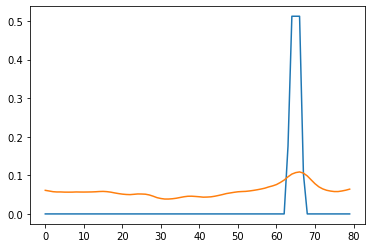

In [137]:
plot_true_vs_pred(8325,4,file_dir)

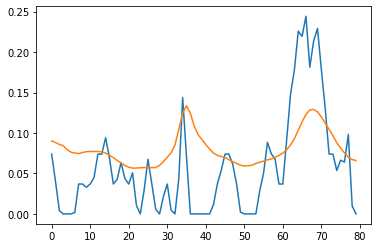

In [138]:
plot_true_vs_pred(7992,0,file_dir)
#test

In [3]:
f = h5py.File(file_dir,'r')

In [139]:
mse_list = []
for seq in f['true']:
    average = np.mean(seq,axis=1)
    diff = np.mean(np.square(seq.T - average))
    mse_list.append(diff)
id_rank = np.argsort(mse_list)

In [4]:
pr_list = []
for seq in f['true']:
    average = np.mean(seq,axis=1)
    coef = np.corrcoef(seq,rowvar=False)
    pr_list.append(np.nanmean(coef))
id_rank = np.argsort(pr_list)

/home/amber/tf_2/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/amber/tf_2/lib/python3.8/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [9]:
pr_list[id_rank[0]]

0.030907503482482168

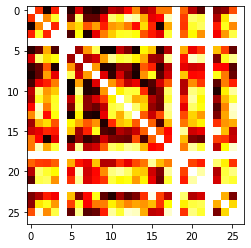

In [ ]:
plt.imshow(coef,cmap='hot')

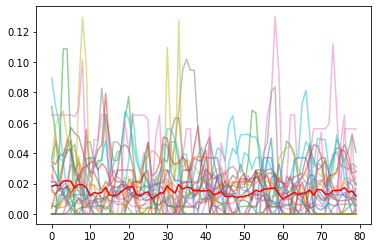

In [16]:
index = id_rank[0]
#index = 6978
true = f['true'][index,:,:]
avergae = np.mean(true,axis=1)
#plt.plot(range(len(true)), true[:,16],alpha=0.5);
plt.plot(range(len(true)), true,alpha=0.5);
plt.plot(range(len(true)), avergae,c = 'r');

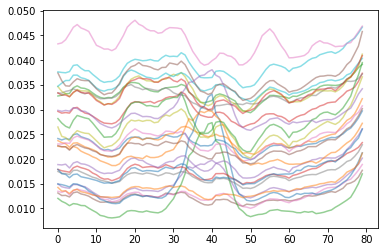

In [17]:
index = id_rank[0]
#index = 6978
true = f['pred'][index,:,:]
avergae = np.mean(true,axis=1)
plt.plot(range(len(true)), true,alpha=0.5);

In [35]:
#7423 similar trend different signal hight
#
#6864 actually noisy